# Archivos para el programa EIS

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import glob
import os
from pathlib import Path

In [52]:
# Ruta a la carpeta que contiene los archivos
carpeta = Path("..")/"data"/"Datos_EIS"

# Lista de voltajes que queremos leer
voltajes_interes = [f"{0.0}V" if v == -0.0 else f"{v:.1f}V" for v in np.round(np.arange(-1, 0.8, 0.1),1)]
# Crear un diccionario para almacenar los DataFrames
datos_eis = {}

# Buscar archivos que coincidan con los voltajes deseados
for voltaje in voltajes_interes:
    patron = os.path.join(carpeta, f"IKZ2_LED_DCV_{voltaje}.txt")
    archivos = glob.glob(patron)  # Encuentra los archivos que coincidan
    
    for archivo in archivos:
        # Extraer el nombre del archivo sin la ruta
        nombre = os.path.basename(archivo)
        # Leer el archivo en un DataFrame (ajusta los parámetros según el formato)
        df = pd.read_csv(archivo, sep=' ', header=None, names=['Zprima', 'Z2prima', 'Frecuencia'],skiprows=1)
        
        # Guardar el DataFrame en el diccionario con el voltaje como clave
        datos_eis[voltaje] = df[df['Frecuencia']<=10000]

# Mostrar los archivos encontrados y cargados
print("Archivos cargados:")
for voltaje, df in datos_eis.items():
    print(f"- {voltaje}: {df.shape[0]} filas")


Archivos cargados:


In [53]:
for key, df in datos_eis.items():

    plt.figure(figsize=(9, 6))
    plt.plot(df['Zprima'],df['Z2prima'],'o-')
    plt.xlabel(r'Z´ ($\Omega$)',fontsize=15)
    plt.ylabel(r'-Z´´ ($\Omega$)',fontsize=15)
    plt.title(f'Diagrama de Nyquist a {key}',fontsize = 15)
    plt.legend()
    plt.tick_params(axis='both', which='major', labelsize=15) 

In [54]:
for key, df in datos_eis.items():
#     if key == '0.6V':
#         df = df[df['Zprima']<2000]
#     elif key=='0.7V':
#         df = df[(df['Zprima']<2500)|(df['Zprima']>4000)]
#     elif key == '0.1V':
#         df = df[df['Zprima']<300]
#     elif key== '0.0V':
#         df = df[df['Zprima']<100]

    # Guardar el DataFrame filtrado de nuevo en el archivo original
    ruta_guardado = os.path.join(carpeta, f"IKZ2_LED_DCV_{key}.txt")
    num_puntos = len(df)
    with open(ruta_guardado,"w") as f:
        f.write(f"{num_puntos}\n")
        df.to_csv(f, sep=" ", index=False,header = False)  # Ajustar el separador si es necesario

In [55]:
# Ruta a la carpeta que contiene los archivos
carpeta_aj = Path('..')/'data'/"AjustesEIS"

# Lista de voltajes que queremos leer
voltajes_interes = [f"{0.0}V" if v == -0.0 else f"{v:.1f}V" for v in np.round(np.arange(-1, 0.8, 0.1),1)]

# Crear un diccionario para almacenar los DataFrames
ajustes_eis = {}

# Buscar archivos que coincidan con los voltajes deseados
for voltaje in voltajes_interes:
   
    patron = os.path.join(carpeta_aj, f"LED_DCV_{voltaje}.txt")
    archivos = glob.glob(patron)  # Encuentra los archivos que coincidan

    for archivo in archivos:
        # Extraer el nombre del archivo sin la ruta
        nombre = os.path.basename(archivo)
        
        # Leer el archivo en un DataFrame (ajusta los parámetros según el formato)
        df = pd.read_csv(archivo, sep=' ')
        df = df.reset_index(drop=True)
        df = df[['Unnamed: 2','Res.','Err.']].rename(columns={'Unnamed: 2':'Variable','Res.':'Ajuste','Err.':'Error'})
        
        # Guardar el DataFrame en el diccionario con el voltaje como clave
        ajustes_eis[voltaje] = df

# Mostrar los archivos encontrados y cargados
print("Archivos cargados:")
for voltaje, df in ajustes_eis.items():
    print(f"- {voltaje}: {df.shape[0]} filas")

Archivos cargados:
- -1.0V: 3 filas
- -0.9V: 3 filas
- -0.8V: 3 filas
- -0.7V: 3 filas
- -0.6V: 3 filas
- -0.5V: 3 filas
- -0.4V: 3 filas
- -0.3V: 3 filas
- -0.2V: 3 filas
- -0.1V: 3 filas
- 0.0V: 3 filas
- 0.1V: 3 filas
- 0.2V: 3 filas
- 0.3V: 3 filas
- 0.4V: 3 filas
- 0.5V: 3 filas
- 0.6V: 3 filas
- 0.7V: 3 filas


In [56]:


# Diccionario para almacenar los DataFrames con los datos de cada voltaje
# ajustes_eis = {}  # Suponemos que ya tienes un df por voltaje en este diccionario

# Lista para almacenar los datos combinados
datos_combinados = []

# Recorrer cada voltaje y su correspondiente DataFrame
for voltaje in voltajes_interes:
    df = ajustes_eis[voltaje]  # Obtener el DataFrame de este voltaje
    
    # Convertir los datos en un diccionario con clave: variable y valores: ajuste, error
    datos = {"Voltaje": voltaje}
    for _, row in df.iterrows():
        variable = row["Variable"]
        datos[variable] = row["Ajuste"]
        datos[f"Error{variable}"] = row["Error"]

    # Agregar el diccionario a la lista
    datos_combinados.append(datos)

# Crear el DataFrame consolidado
df_final = pd.DataFrame(datos_combinados)




In [57]:
df_final

,Voltaje,C1,ErrorC1,R1,ErrorR1,R2,ErrorR2
0,-1.0V,1.062700e-07,0.12154,2.5913,14.80800,7401.6000,0.16243
1,-0.9V,1.093200e-07,0.12947,2.5674,15.73300,8427.8000,0.18105
2,-0.8V,1.125700e-07,0.14137,2.6027,16.76500,9826.8000,0.20912
3,-0.7V,1.161700e-07,0.17448,2.6364,20.20300,11693.0000,0.27626
4,-0.6V,1.201900e-07,0.17647,2.6416,20.15500,14149.0000,0.30327
5,-0.5V,1.246600e-07,0.14839,2.6575,16.64800,17498.0000,0.28297
6,-0.4V,1.296900e-07,0.16319,2.6720,17.95300,22028.0000,0.35454
7,-0.3V,1.354300e-07,0.15755,2.6710,17.00200,27787.0000,0.39726
8,-0.2V,1.419700e-07,0.17357,2.6729,18.22000,34780.0000,0.51765
9,-0.1V,1.496600e-07,0.18089,2.6707,18.20800,38630.0000,0.59776


## CVs

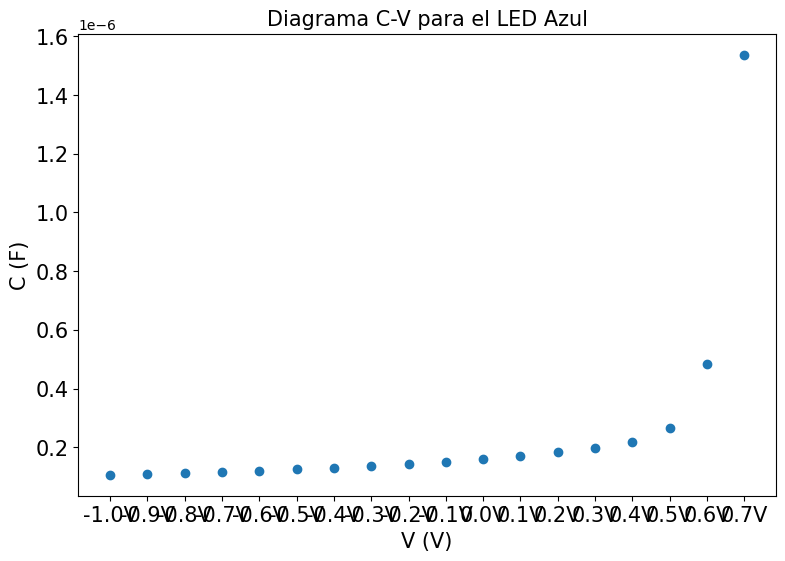

In [58]:
plt.figure(figsize=(9, 6))
plt.plot(df_final['Voltaje'],df_final['C1'],'o')
plt.xlabel(r'V (V)',fontsize=15)
plt.ylabel(r'C (F)',fontsize=15)
plt.title(f'Diagrama C-V para el LED Azul',fontsize = 15)
# plt.legend()
plt.tick_params(axis='both', which='major', labelsize=15) 

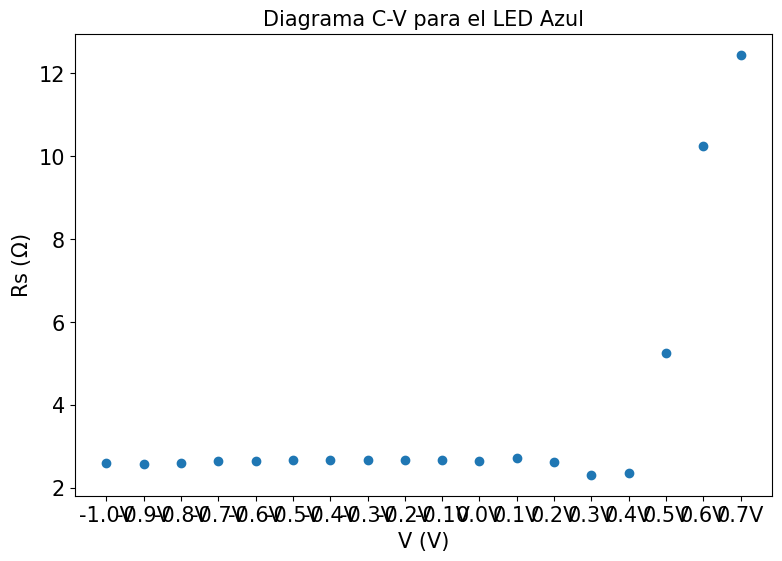

In [59]:
plt.figure(figsize=(9, 6))
plt.plot(df_final['Voltaje'],df_final['R1'],'o')
plt.xlabel(r'V (V)',fontsize=15)
plt.ylabel(r'Rs ($\Omega$)',fontsize=15)
plt.title(f'Diagrama C-V para el LED Azul',fontsize = 15)
# plt.legend()
plt.tick_params(axis='both', which='major', labelsize=15) 

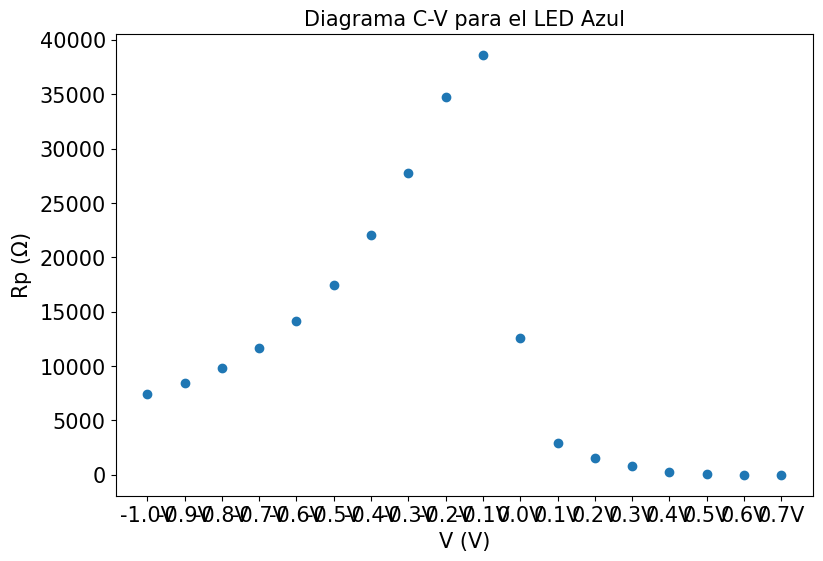

In [60]:
plt.figure(figsize=(9, 6))
plt.plot(df_final['Voltaje'],df_final['R2'],'o')
plt.xlabel(r'V (V)',fontsize=15)
plt.ylabel(r'Rp ($\Omega$)',fontsize=15)
plt.title(f'Diagrama C-V para el LED Azul',fontsize = 15)
# plt.legend()
plt.tick_params(axis='both', which='major', labelsize=15) 

In [61]:
df_final = df_final.rename(columns={'ErrorC1':'ErrorC1%','ErrorR1':'ErrorR1%','ErrorR2':'ErrorR2%'})

In [62]:
df_final

,Voltaje,C1,ErrorC1%,R1,ErrorR1%,R2,ErrorR2%
0,-1.0V,1.062700e-07,0.12154,2.5913,14.80800,7401.6000,0.16243
1,-0.9V,1.093200e-07,0.12947,2.5674,15.73300,8427.8000,0.18105
2,-0.8V,1.125700e-07,0.14137,2.6027,16.76500,9826.8000,0.20912
3,-0.7V,1.161700e-07,0.17448,2.6364,20.20300,11693.0000,0.27626
4,-0.6V,1.201900e-07,0.17647,2.6416,20.15500,14149.0000,0.30327
5,-0.5V,1.246600e-07,0.14839,2.6575,16.64800,17498.0000,0.28297
6,-0.4V,1.296900e-07,0.16319,2.6720,17.95300,22028.0000,0.35454
7,-0.3V,1.354300e-07,0.15755,2.6710,17.00200,27787.0000,0.39726
8,-0.2V,1.419700e-07,0.17357,2.6729,18.22000,34780.0000,0.51765
9,-0.1V,1.496600e-07,0.18089,2.6707,18.20800,38630.0000,0.59776


In [63]:
df_final['ErrorC1'] = df_final['C1']*df_final['ErrorC1%']
df_final['ErrorR1'] = df_final['R1']*df_final['ErrorR1%']
df_final['ErrorR2'] = df_final['R2']*df_final['ErrorR2%']

In [64]:
df_final['Tiempo de vida medio'] = df_final['C1']*df_final['R2']

df_final['Error Tau'] = np.sqrt((df_final['ErrorC1']*df_final['R2'])**2+(df_final['C1']*df_final['ErrorR2'])**2)

In [65]:
df_final

,Voltaje,C1,ErrorC1%,R1,ErrorR1%,R2,ErrorR2%,ErrorC1,ErrorR1,ErrorR2,Tiempo de vida medio,Error Tau
0,-1.0V,1.062700e-07,0.12154,2.5913,14.80800,7401.6000,0.16243,1.291606e-08,38.371970,1202.241888,0.000787,0.000160
1,-0.9V,1.093200e-07,0.12947,2.5674,15.73300,8427.8000,0.18105,1.415366e-08,40.392904,1525.853190,0.000921,0.000205
2,-0.8V,1.125700e-07,0.14137,2.6027,16.76500,9826.8000,0.20912,1.591402e-08,43.634266,2054.980416,0.001106,0.000279
3,-0.7V,1.161700e-07,0.17448,2.6364,20.20300,11693.0000,0.27626,2.026934e-08,53.263189,3230.308180,0.001358,0.000444
4,-0.6V,1.201900e-07,0.17647,2.6416,20.15500,14149.0000,0.30327,2.120993e-08,53.241448,4290.967230,0.001701,0.000597
5,-0.5V,1.246600e-07,0.14839,2.6575,16.64800,17498.0000,0.28297,1.849830e-08,44.242060,4951.409060,0.002181,0.000697
6,-0.4V,1.296900e-07,0.16319,2.6720,17.95300,22028.0000,0.35454,2.116411e-08,47.970416,7809.807120,0.002857,0.001115
7,-0.3V,1.354300e-07,0.15755,2.6710,17.00200,27787.0000,0.39726,2.133700e-08,45.412342,11038.663620,0.003763,0.001608
8,-0.2V,1.419700e-07,0.17357,2.6729,18.22000,34780.0000,0.51765,2.464173e-08,48.700238,18003.867000,0.004938,0.002696
9,-0.1V,1.496600e-07,0.18089,2.6707,18.20800,38630.0000,0.59776,2.707200e-08,48.628106,23091.468800,0.005781,0.003611


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Si no tienes el DataFrame cargado aún, reemplaza esta línea por pd.read_csv o similar.
# df_final = pd.read_csv("nombre_archivo.csv")

# Asegurar que el voltaje esté como número (eliminar la 'V' si es necesario)
df_final['Voltaje_num'] = df_final['Voltaje'].str.replace('V', '', regex=False).astype(float)


# Filtrar fuera el valor de 0.7 V
df_filtrado = df_final[(df_final['Voltaje_num'] < 0.6)&(df_final['Voltaje_num'] >-0.2)]


In [67]:
df_filtrado

,Voltaje,C1,ErrorC1%,R1,ErrorR1%,R2,ErrorR2%,ErrorC1,ErrorR1,ErrorR2,Tiempo de vida medio,Error Tau,Voltaje_num
9,-0.1V,1.496600e-07,0.18089,2.6707,18.2080,38630.000,0.59776,2.707200e-08,48.628106,23091.468800,0.005781,0.003611,-0.1
10,0.0V,1.585200e-07,0.16792,2.6467,14.7510,12561.000,0.30754,2.661868e-08,39.041472,3863.009940,0.001991,0.000698,0.0
11,0.1V,1.691200e-07,0.19646,2.7130,13.6220,2954.400,0.23079,3.322532e-08,36.956486,681.845976,0.000500,0.000151,0.1
12,0.2V,1.821000e-07,0.26772,2.6208,16.3250,1541.300,0.26421,4.875181e-08,42.784560,407.226873,0.000281,0.000106,0.2
13,0.3V,1.982800e-07,0.34554,2.3138,19.3420,791.090,0.28328,6.851367e-08,44.753520,224.099975,0.000157,0.000070,0.3
14,0.4V,2.192000e-07,0.42671,2.3606,15.3030,291.210,0.26604,9.353483e-08,36.124262,77.473508,0.000064,0.000032,0.4
15,0.5V,2.651500e-07,0.31410,5.2524,1.6183,83.103,0.12474,8.328361e-08,8.499959,10.366268,0.000022,0.000007,0.5


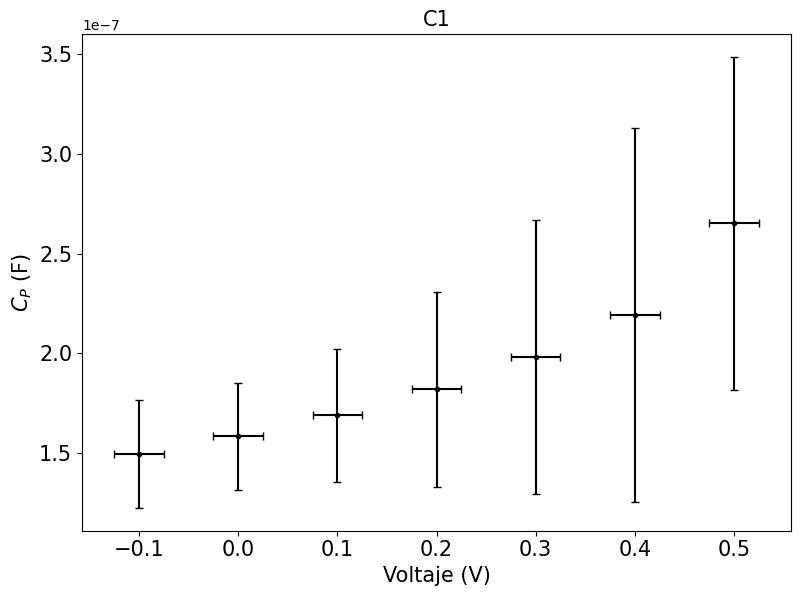

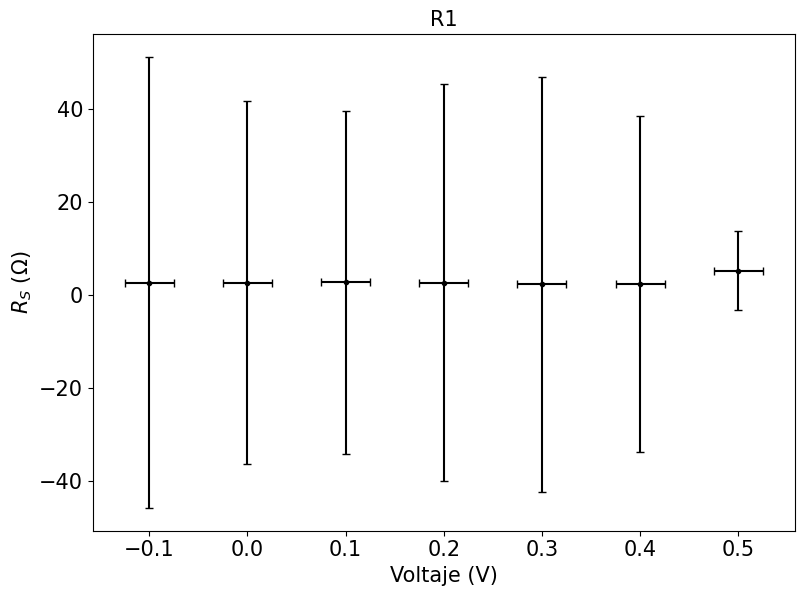

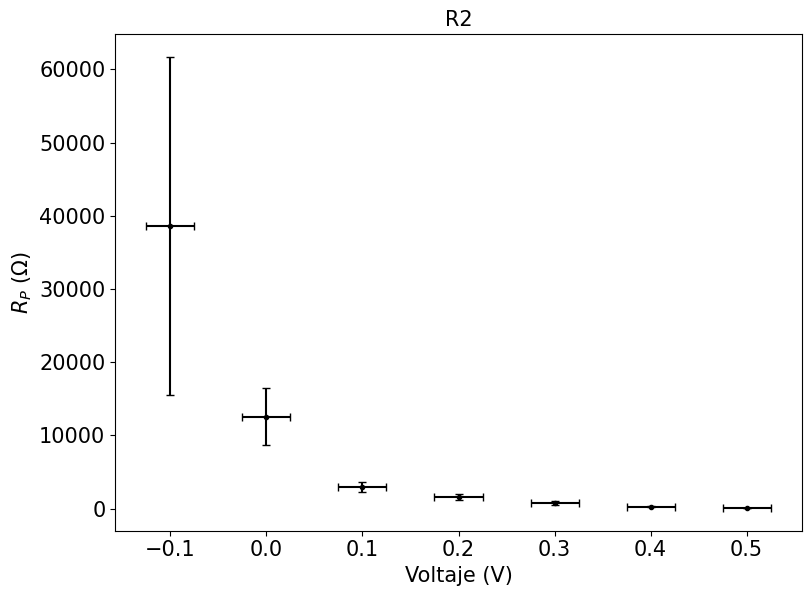

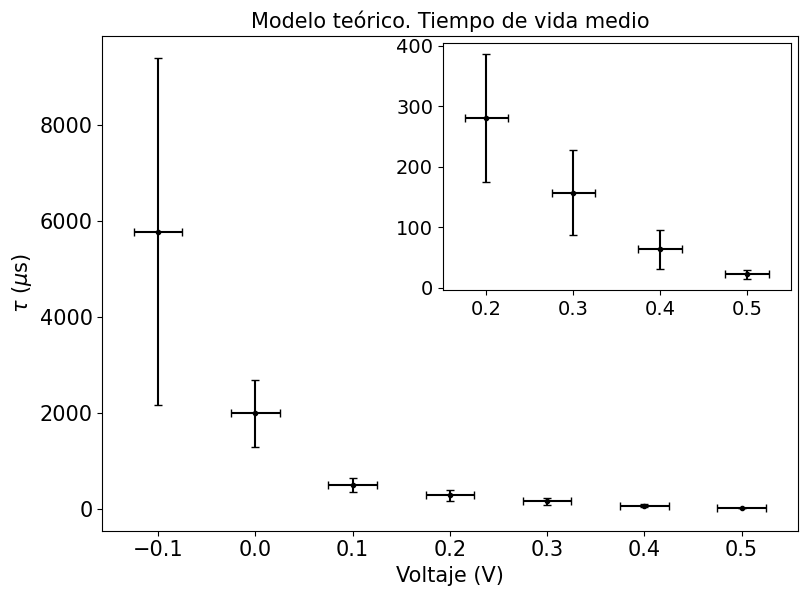

In [68]:

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Lista de parámetros a graficar con sus respectivos errores y etiquetas
parametros = [
    ('C1', 'ErrorC1', r'$C_P$ (F)'),
    ('R1', 'ErrorR1', r'$R_S$ ($\Omega$)'),
    ('R2', 'ErrorR2', r'$R_P$ ($\Omega$)'),
    ('Tiempo de vida medio', 'Error Tau', r'$\tau$ ($\mu$s)')
]

verr = 0.025

for param, err, ylabel in parametros:
    plt.figure(figsize=(8, 6))

    # Si es 'Tiempo de vida medio', convertir a microsegundos
    if param == 'Tiempo de vida medio':
        y_values = df_filtrado[param] * 1e6
        y_errors = df_filtrado[err] * 1e6
    else:
        y_values = df_filtrado[param]
        y_errors = df_filtrado[err]

    plt.errorbar(df_filtrado['Voltaje_num'], y_values,
                 xerr=verr, yerr=y_errors,
                 fmt='.', capsize=3, color='k', label=param)

    plt.title('Modelo teórico. Tiempo de vida medio' if param == 'Tiempo de vida medio' else param, fontsize=15)
    plt.xlabel('Voltaje (V)', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.tight_layout()
    plt.tick_params(labelsize=15)

    # Añadir zoom solo para tiempo de vida medio
    if param == 'Tiempo de vida medio':
        ax = plt.gca()
        axins = inset_axes(ax, width="50%", height="50%", loc='upper right')

        # Filtro de zoom: voltajes entre 0.2 y 0.5
        mask_zoom = (df_filtrado['Voltaje_num'] >= 0.2) & (df_filtrado['Voltaje_num'] <= 0.5)
        volt_zoom = df_filtrado['Voltaje_num'][mask_zoom]
        val_zoom = y_values[mask_zoom]
        err_zoom = y_errors[mask_zoom]

        axins.errorbar(volt_zoom, val_zoom, xerr=verr, yerr=err_zoom,
                       fmt='.', capsize=3, color='k')
        axins.set_xlim(0.15, 0.55)
        # axins.set_title('Zoom', fontsize=10)
        axins.tick_params(labelsize=14)

    plt.show()


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14568\4149870865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Volt'] = df_filtrado['Voltaje'].str.replace('V', '').astype(float)


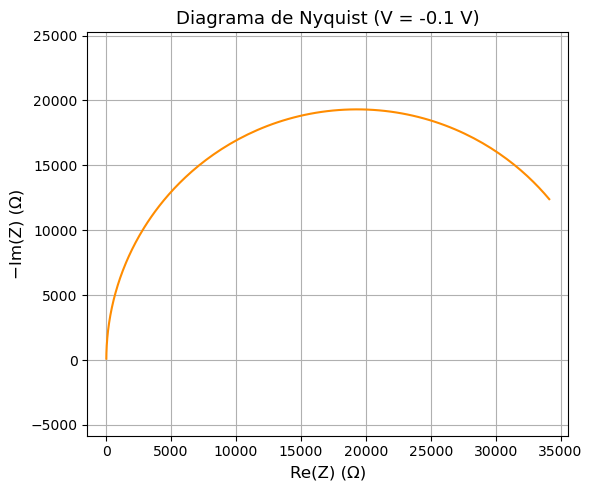

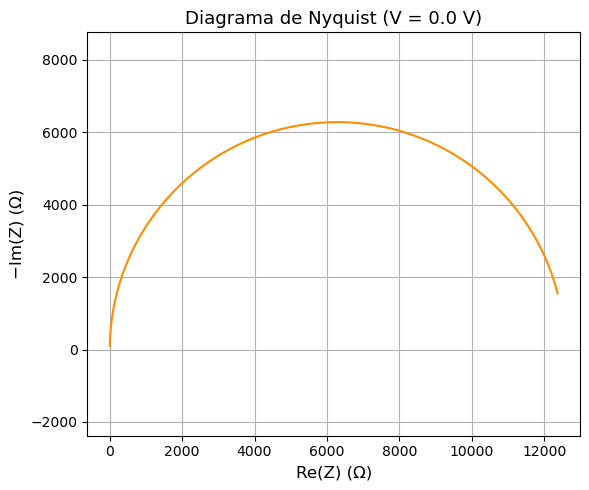

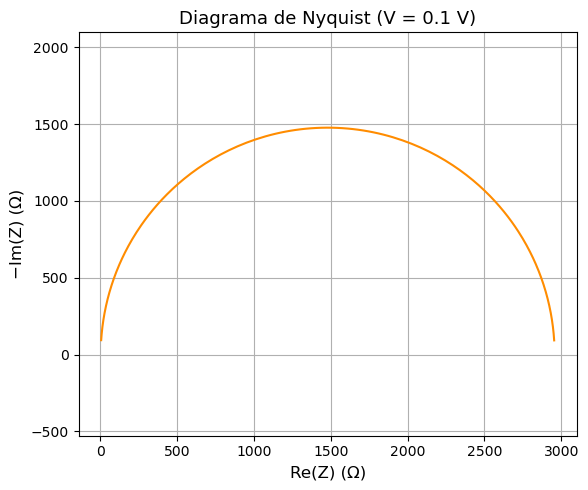

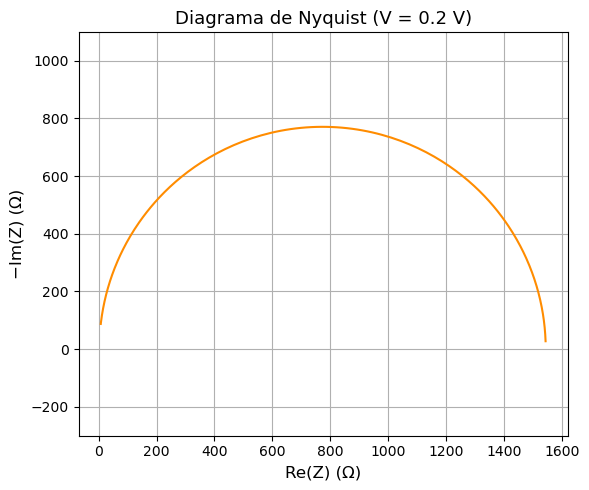

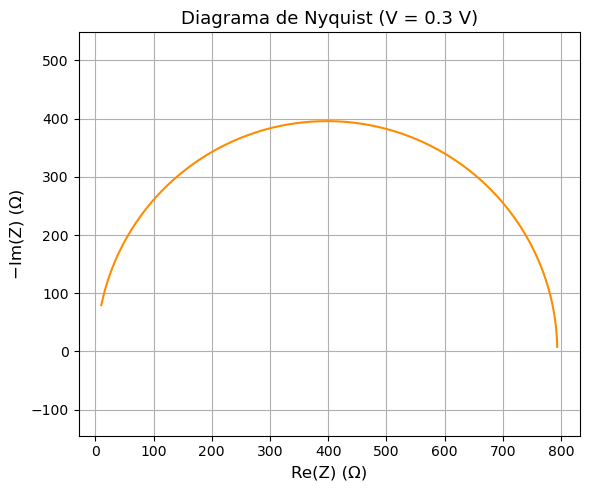

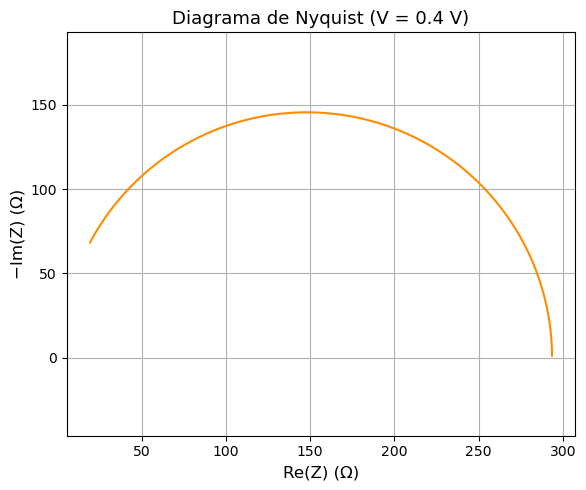

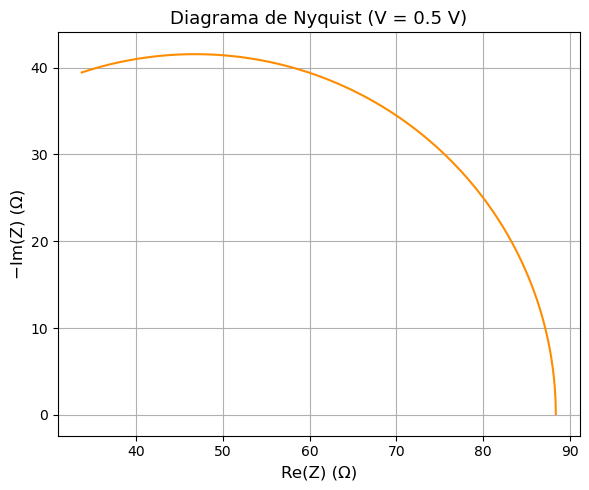

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de frecuencias (en Hz)
frecuencias = np.logspace(np.log10(10), np.log10(10000), 300)
omega = 2 * np.pi * frecuencias

# Convertir voltaje a string sin la 'V' si está presente
df_filtrado['Volt'] = df_filtrado['Voltaje'].str.replace('V', '').astype(float)

for i, row in df_filtrado.iterrows():
    R1 = row['R1']
    R2 = row['R2']
    C1 = row['C1']
    voltaje = row['Volt']

    # Impedancia teórica para este voltaje
    Z = R1 + R2 / (1 + 1j * omega * R2 * C1)

    # Graficar diagrama de Nyquist
    plt.figure(figsize=(6, 5))
    plt.plot(Z.real, -Z.imag, color='darkorange')
    plt.title(f'Diagrama de Nyquist (V = {voltaje:.1f} V)', fontsize=13)
    plt.xlabel('Re(Z) (Ω)', fontsize=12)
    plt.ylabel('−Im(Z) (Ω)', fontsize=12)
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
for key, df in datos_eis.items():

    plt.figure(figsize=(9, 6))
    plt.plot(df['Zprima'],df['Z2prima'],'o-')
    plt.xlabel(r'Z´ ($\Omega$)',fontsize=15)
    plt.ylabel(r'-Z´´ ($\Omega$)',fontsize=15)
    plt.title(f'Diagrama de Nyquist para el LED Azul a {key}',fontsize = 15)
    plt.legend()
    plt.tick_params(axis='both', which='major', labelsize=15) 



In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de frecuencias (en Hz)
frecuencias = np.logspace(np.log10(10), np.log10(10000), 300)
omega = 2 * np.pi * frecuencias

# Preprocesar voltajes para coincidir claves y nombres
df_filtrado['Volt'] = df_filtrado['Voltaje'].str.replace('V', '').astype(float)
voltajes_ajuste = df_filtrado['Volt'].values

for key, df_exp in datos_eis.items():
    volt_str = key.replace('V', '')  # '0.0V' -> '0.0'
    try:
        volt_float = float(volt_str)
    except:
        continue

    # Buscar la fila correspondiente en el dataframe de ajustes
    fila_ajuste = df_filtrado[np.isclose(df_filtrado['Volt'], volt_float)]
    if fila_ajuste.empty:
        continue

    R1 = fila_ajuste['R1'].values[0]
    R2 = fila_ajuste['R2'].values[0]
    C1 = fila_ajuste['C1'].values[0]

    # Impedancia teórica
    Z_teo = R1 + R2 / (1 + 1j * omega * R2 * C1)

    # Graficar datos experimentales y curva teórica
    plt.figure(figsize=(7, 6))
    plt.plot(df_exp['Zprima'], df_exp['Z2prima'], 'k^', label='Datos experimentales')
    plt.plot(Z_teo.real, -Z_teo.imag, '-', label='Ajuste teórico', color='red')
    plt.xlabel(r'$Z^\prime$ ($\Omega$)', fontsize=15)
    plt.ylabel(r'$-Z^{\prime\prime}$ ($\Omega$)', fontsize=15)
    plt.title(f'Diagrama de Nyquist (V = {volt_float:.1f} V)', fontsize=15)
    plt.grid(True)
    plt.legend(fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14568\2722499631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Volt'] = df_filtrado['Voltaje'].str.replace('V', '').astype(float)


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14568\279595007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Volt'] = df_filtrado['Voltaje'].str.replace('V', '').astype(float)
C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14568\279595007.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=13, loc='best', ncol=2)


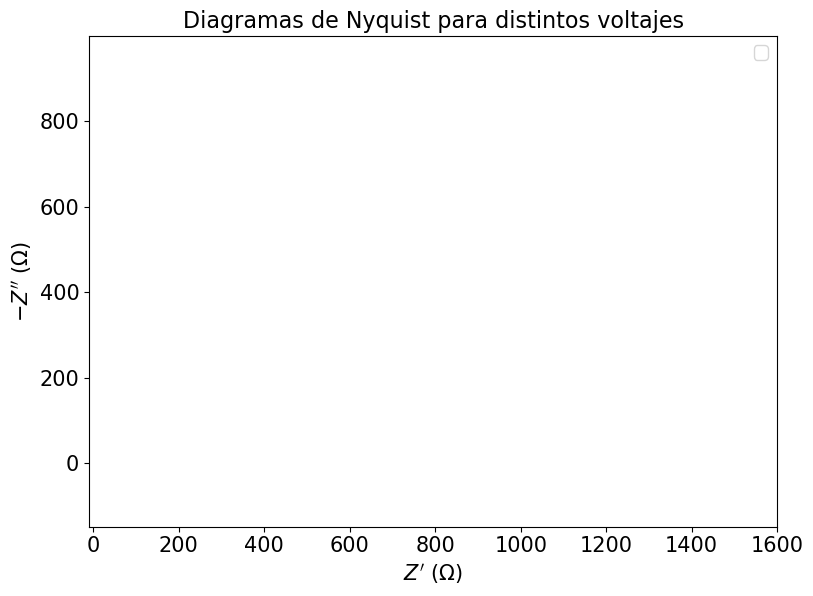

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de frecuencias
frecuencias = np.logspace(np.log10(10), np.log10(10000), 300)
omega = 2 * np.pi * frecuencias

# Preprocesar voltajes en df_filtrado para facilitar emparejamiento
df_filtrado['Volt'] = df_filtrado['Voltaje'].str.replace('V', '').astype(float)

# Lista de marcadores distintos
marcadores = [ '^', 's', 'D', 'v', 'p', '*', 'X', '<', '>']
marksizes = [8,7,5]
i_marker = 0  # Índice para recorrer marcadores

# Crear la figura
plt.figure(figsize=(8, 6))

for key, df_exp in datos_eis.items():
    volt_str = key.replace('V', '')
    try:
        volt_float = float(volt_str)
    except:
        continue

    fila_ajuste = df_filtrado[np.isclose(df_filtrado['Volt'], volt_float)]
    if fila_ajuste.empty:
        continue

    R1 = fila_ajuste['R1'].values[0]
    R2 = fila_ajuste['R2'].values[0]
    C1 = fila_ajuste['C1'].values[0]

    # Impedancia teórica
    Z_teo = R1 + R2 / (1 + 1j * omega * R2 * C1)

    if volt_float in [0.2, 0.3, 0.4]:
        marcador = marcadores[i_marker % len(marcadores)]  # Seleccionar marcador
        marksize = marksizes[i_marker % len(marcadores)]
        i_marker += 1

        # Graficar datos experimentales con marcador único
        plt.plot(df_exp['Zprima'], df_exp['Z2prima'], marcador, markersize=marksize, label=f'Datos exp. {volt_float:.1f} V')
        plt.plot(Z_teo.real, -Z_teo.imag, 'k-', label=f'Ajuste {volt_float:.1f} V')

# Configuración de la gráfica
plt.xlabel(r'$Z^\prime$ ($\Omega$)', fontsize=15)
plt.ylabel(r'$-Z^{\prime\prime}$ ($\Omega$)', fontsize=15)
plt.title('Diagramas de Nyquist para distintos voltajes', fontsize=16)
# plt.grid(True)
plt.axis('equal')
plt.legend(fontsize=13, loc='best', ncol=2)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.axis([-10,1600,-200,1050])
plt.show()
